**Retno Puji Astuti**

**24083010080**

**Analisis Numerik A**

**1. Mainkan parameter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)**

Text(0.5, 1.0, 'quality of life (khusus sehat)')

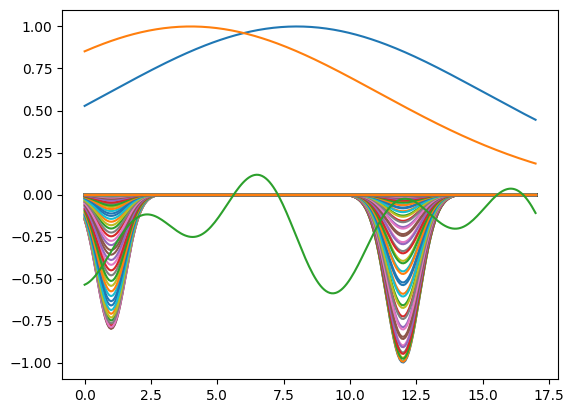

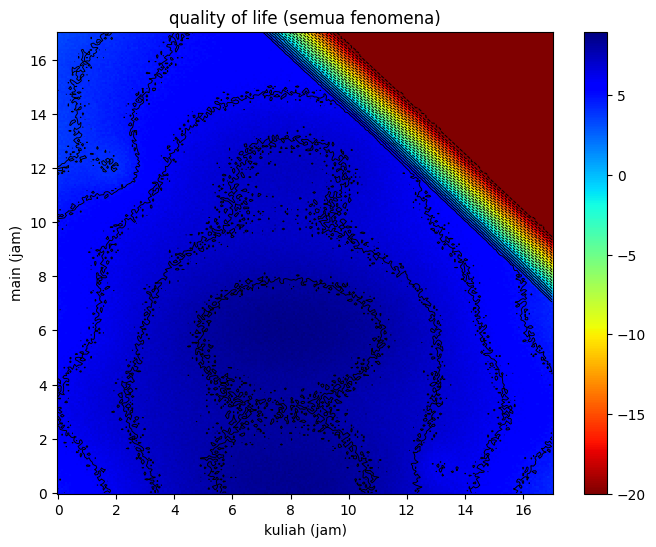

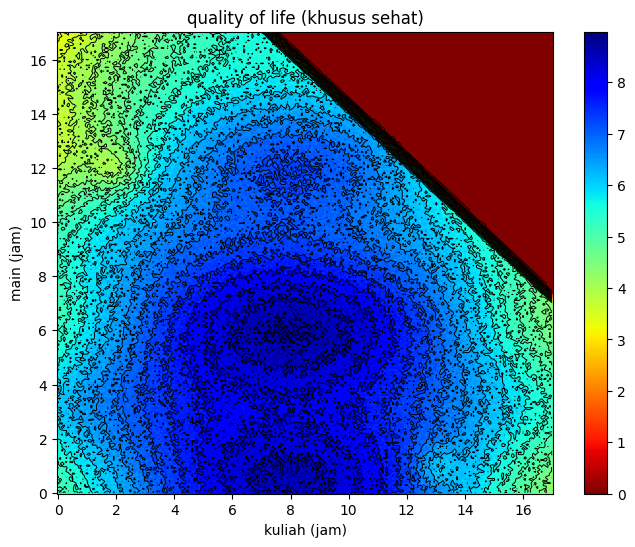

In [5]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 7 # istirahat yang cukup

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# kuliah
plt.plot(x, np.exp(-((x -(8.0))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(8.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
#plt.plot(x, -total_penalty)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)   # kebanyakan main
plt.plot(x, -kebanyakan_main)
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)  # kebanyakan lembur
plt.plot(y, -kebanyakan_lembur )

# naik-turun motivasi harian
NPM = 80
np.random.seed(NPM)
plt.plot(x, 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# objective function
# quality of life
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (0.6 * kuliah_pref + 0.3 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")

**Penjelasan**

**1. 'quality of life (khusus sehat)'=**

a. Merupakan visualisasi untuk fungsi-fungsi kualitas hidup yang dimana setiap kurvanya mewakili faktor-faktor seperti kuliah, main dan lainnya.

b. Pada kurva yang membentuk gelombang menunjukkan adanya variasi kualitas hidup yang tergantung dengan macam-macam kombinasi waktu aktivitas manusia.

c. kurva berwarna hijau menunjukkan faktor yang tidak beraturan, seperti motivasi setiap harinya.

d. kurva berwarna biru mewakili faktor kuliah dan kurva berwarna orange mewakili faktor bermain.

**2. 'quality of life (semua fenomena)'=**

a. Pada warna biru tua menunjukkan bahwa kualtias hidup paling tinggi. Semakin berubah warna menjadi warna hijau dan kuning kualitas hidup sedang dan warna merah menunjukkan kualitas hidup yang sangat rendah atau waktu aktivitas yang melebihi 24 jam.

b. Dalam pola melingkar diantara waktu 6-8 jam kuliah dan 6-8 jam main yang memungkinkan titik untuk kualitas hidup yang lebih baik dan normal.

**3. 'quality of life (khusus sehat)'=**

a. Hampir sama dengan semua fenomena, namun pada visualisasi ini hanya menghitung faktor kesehatan saja tanpa menghitung faktor lain.

b. Pada warna biru menunjukkan kualitas hidup relatif tinggi sehat dan warna kuning ataupun hijau menunjukkan kualitas hidup yang sedang atau semakin menurun.

c. Titik-titik gelombang lebih teratur yang menandakan bahwa kesehatan sangat dipengaruhi oleh proporsi waktu.

d. Titik optimal terlihat diantara waktu kuliah ≤ 6 jam dan waktu main ≥ 12 jam, dikarenakan warna kuning yang paling terang dan menandakan bahwa kesehatan relatif maksimal jika tidak terlalu banyak kuliah dan ada waktu cukup untuk aktivitas santai/main.

**1a. plot grafik-grafik secara berdampingan untuk membandingkan skalanya**

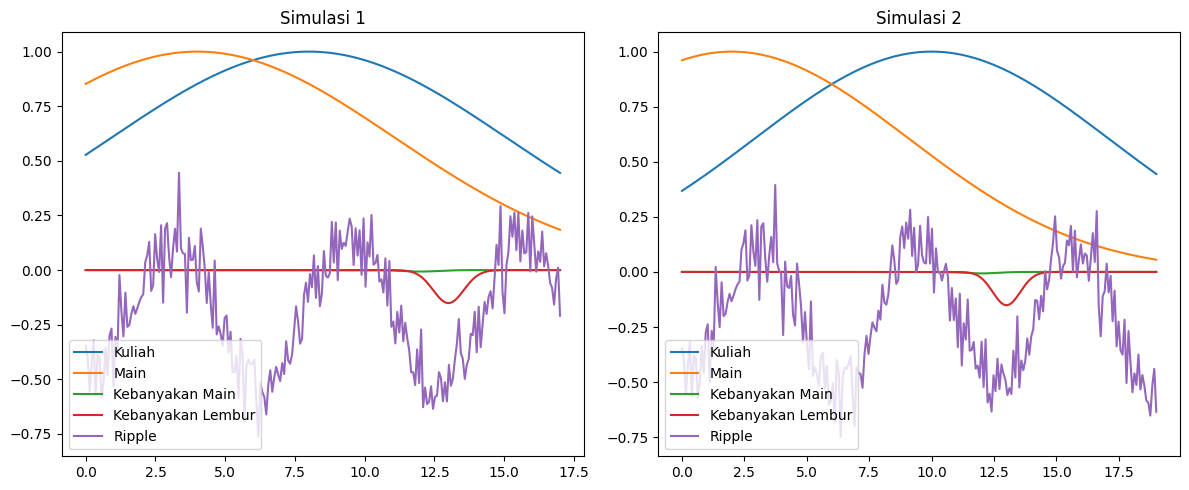

In [6]:
# @title
import numpy as np
import matplotlib.pyplot as plt

def faktor_lines(istirahat, jam_kuliah, jam_main, seed=80):
    xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
    res = 240
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    X, Y = np.meshgrid(x, y)

    # preferensi kuliah & main
    kuliah_pref = np.exp(-((x - jam_kuliah)**2) / (10**2))
    main_pref = np.exp(-((y - jam_main)**2) / (10**2))

    # penalty waktu total
    total_waktu = X + Y
    total_penalty = 0.2 * np.exp(total_waktu / 24.0)

    # faktor negatif
    kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
    kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)

    # ripple + noise
    np.random.seed(seed)
    ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
    noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
    ripple += noise

    return x, y, kuliah_pref, main_pref, kebanyakan_main, kebanyakan_lembur, ripple

# Simulasi 1
x1, y1, k1, m1, km1, kl1, r1 = faktor_lines(7, 8, 4)

# Simulasi 2
x2, y2, k2, m2, km2, kl2, r2 = faktor_lines(5, 10, 2)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(x1, k1, label="Kuliah")
axes[0].plot(y1, m1, label="Main")
axes[0].plot(x1, -km1[:,0], label="Kebanyakan Main")
axes[0].plot(y1, -kl1[0,:], label="Kebanyakan Lembur")
axes[0].plot(x1, r1[:,0], label="Ripple")
axes[0].set_title("Simulasi 1")
axes[0].legend()

axes[1].plot(x2, k2, label="Kuliah")
axes[1].plot(y2, m2, label="Main")
axes[1].plot(x2, -km2[:,0], label="Kebanyakan Main")
axes[1].plot(y2, -kl2[0,:], label="Kebanyakan Lembur")
axes[1].plot(x2, r2[:,0], label="Ripple")
axes[1].set_title("Simulasi 2")
axes[1].legend()

plt.tight_layout()
plt.show()

**Penjelasan**

a. Ripple merupakan tambahan aktivitas atau gangguan noise yang mewakili aktivitas yang tidak pasti dalam hidup, misalnya tugas mendadak, sakit, pulang kampung dan lainnya. Serta menunjukkan kenyataannya tidak semua waktu bisa dikendalikan.

b. Pada simulasi 1 dan 2 hasilnya hampir mirip, namun pada noise atau ripplenya saja yang sedikit berbeda, karena waktu aktivitas dan istirahat yang juga berbeda. Sehingga hasil akhirnya juga bisa berubah sesuai dengan waktu masing-masing manusia.

c. Pada kurva "kebanyakan lembur" yang tinggi menunjukkan kualitas hidup yang mulai menurun atau menandakan kelelahan sehingga kualitas hidup tidak seimbang.

**2. tambahkan faktor-faktor ke objective function**

Text(0.5, 1.0, 'quality of life (khusus sehat + bersih-bersih & ibadah)')

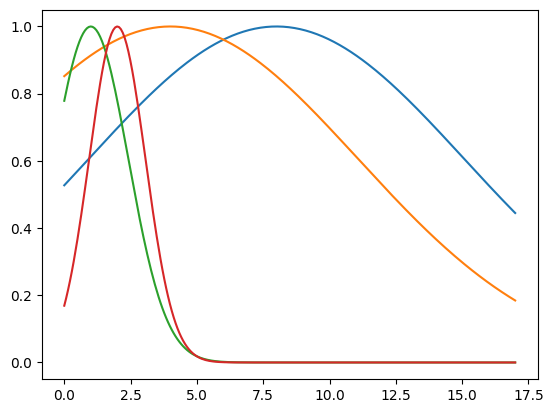

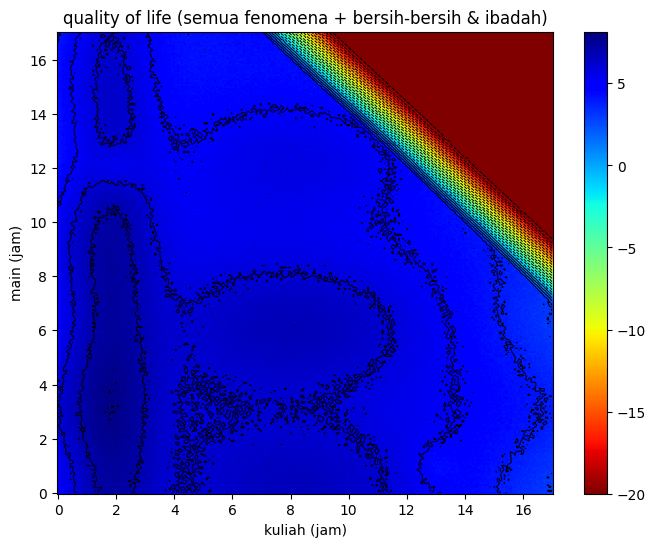

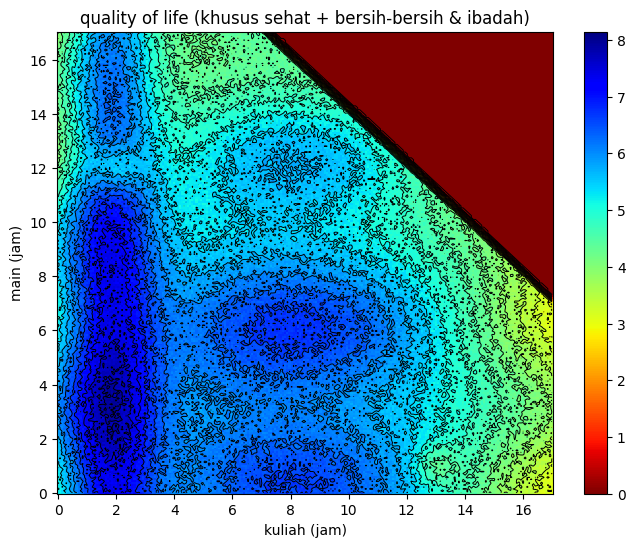

In [7]:
# @title
# kuliah
plt.plot(x, np.exp(-((x -(8.0))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(8.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# faktor bersih-bersih
plt.plot(x, np.exp(-((x - 1.0)**2) / (2.0**2)))  # bersih-bersih sekitar 1 jam
bersih_pref = np.exp(-((X - 1.0)**2) / (2.0**2))

# faktor ibadah
plt.plot(x, np.exp(-((x - 2.0)**2) / (1.5**2)))  # ibadah singkat tapi rutin
ibadah_pref = np.exp(-((X - 2.0)**2) / (1.5**2))

# objective function (quality of life)
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (
    0.5 * kuliah_pref +     # bobot kuliah
    0.2 * main_pref +       # bobot main
    0.15 * bersih_pref +    # bobot bersih-bersih
    0.15 * ibadah_pref      # bobot ibadah
)

Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena + bersih-bersih & ibadah)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat + bersih-bersih & ibadah)")

**Penjelasan**

**1. 'quality of life (kuliah + main + bersih-bersih & ibadah)' =**

a. Visualisasi ini memperlihatkan bagaimana kualitas hidup dipengaruhi oleh proporsi waktu kuliah, main, serta tambahan aktivitas bersih-bersih dan ibadah yang memberi efek positif terhadap keseimbangan hidup.

b. Warna biru tua masih menunjukkan kualitas hidup yang relatif tinggi, namun dibanding model kuliah+main saja, skala nilainya lebih rendah karena ada kontribusi positif dari ibadah & bersih-bersih.

c. Warna hijau dan kuning merepresentasikan area dengan kualitas hidup yang semakin menurun. Titik-titik terang ini muncul pada proporsi waktu kuliah dan main yang moderat, ditambah waktu yang dialokasikan untuk ibadah/bersih.

d. Pola gelombang (contour) lebih teratur dan halus dibandingkan model “semua fenomena”, karena faktor ibadah dan bersih-bersih berperan sebagai penyeimbang.

e. Titik optimal terlihat ketika kuliah ≤ 6–8 jam dan main 2–6 jam, dengan tambahan waktu ibadah/bersih sekitar 0,5–1,5 jam, ditandai dengan warna kuning yang paling terang.



**2. Perbandingan 'kuliah+main' saja vs 'kuliah+main+ibadah/bersih'**

a. Model kuliah+main saja:
Pola kualitas hidup sangat dipengaruhi oleh keseimbangan dua faktor itu saja. Kualitas hidup cepat turun jika kuliah atau main terlalu banyak. Area optimal terbatas, lebih sempit.


b. Model kuliah+main+ibadah/bersih:
Memberi “bonus kualitas hidup” karena ada faktor positif tambahan yang memperbaiki keseimbangan. Warna terang (kuning/hijau) lebih luas dibanding model kuliah+main saja.Kualitas hidup lebih stabil karena ibadah dan bersih-bersih bertindak sebagai “buffer” terhadap kelelahan.

**3. temukan titik optimum sesuai diri masing-masing,**

**# temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax**

In [8]:
z_max = -1e9
opt_x, opt_y = None, None

for i in range(Z_clip.shape[0]):
    for j in range(Z_clip.shape[1]):
        if Z_clip[i, j] > z_max:
            z_max = Z_clip[i, j]
            opt_x = X[i, j]
            opt_y = Y[i, j]

print(f"Nilai optimum quality of life = {z_max:.4f}")
print(f"Terjadi pada: kuliah = {opt_x:.2f} jam, main = {opt_y:.2f} jam")

Nilai optimum quality of life = 8.1424
Terjadi pada: kuliah = 2.06 jam, main = 3.20 jam


**Penjelasan**

**1. Nilai optimum = 8,..**

a. Nilai tersebut menunjukkan kualitas hidup tertinggi yang dapat dicapai oleh model, jika nilainya semakin tinggi maka semakin baik juga kondisi hidup yang di simulasikan.

**2. Kuliah = 2,..**

a. Kualitas hidup tertinggi muncul ketika beban kuliah yang relatif kecil, artinya semakin banyak waktu kuliah juga tidak berarti lebih baik karena dapat mengurangi/menganggu waktu untuk aktivitas yang lainnya.

**3. Main = 3,..**

a. Setiap manusia juga membutuhkan hiburan meskipun hanya sebentar, agar kebutuhan menjadi seimbang. Artinya jika terdapat waktu kuliah masih ada waktu untuk bermain atau berkegiatan lainnya.

**Penjelasan keseluruhan**

Jika kualitas hidup tidak maksimal ketika terlalu banyak kuliah ataupun terlalu banyak main, justru titik terbaik yang akan muncul sedikit namun seimbang. Jika tertalu lama kuliah dapat mengakibatkan stress, kelelahan dan dapat menurunkan quality of life. Jika terlalu banyak bermain memang membuat senang, namun kegiatan akademik akan terganggu dan juga dapat menurunkan quality of life. Sehingga nilai optimum yang terdapat pada zona tengah hingga kebawah merupakan waktu yang bernar-benar cukup dengan kebutuhan manusia.

**4. buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat**

Pagi hari saya terbangun dengan cukup segar setelah tidur malam selama 7–8 jam. Setelah bersiap, saya berangkat ke kampus untuk mengikuti kuliah sekitar 2 jam. Hari itu ada dua kelas sehingga total waktu kuliah menjadi sekitar 5 jam. Setelah selesai, saya meluangkan 2 jam untuk mengerjakan tugas agar tidak menumpuk.

Sore harinya saya pulang dan beristirahat sambil bermain media sosial selama 2–3 jam untuk hiburan. Setelah itu, saya meluangkan 1 jam untuk bersih-bersih dan merapikan diri. Tidak lupa saya menyisihkan waktu untuk ibadah, sekaligus meninjau kembali materi perkuliahan atau belajar hal ringan sebagai persiapan esok hari.

Dengan pola ini, waktu kuliah dan main tetap ada porsinya, tetapi tidak mengganggu kesehatan karena masih ada tidur cukup, waktu istirahat, dan aktivitas produktif lainnya.